# 텐서플로와 케라스

### Tensorflow 설치

- 설치 사이트 : https://www.tensorflow.org/install?hl=ko

- 공식사이트: https://www.tensorflow.org/?hl=ko

In [1]:
import tensorflow as tf
tf.__version__

'2.16.1'

### 텐서플로(tensorflow)

- 구글에서 만든 파이썬 기반의 무료 오픈소스 머신러닝 플랫폼
    - 2015년 11월 오픈소스로 공개(아파치2.0 오픈소스 라이선스)
    - 2016년 3월 알파고가 이세돌 9단 승리
    - 2019년 9월 2.0 버전 릴리즈
    - 2020년 5월 2.2.0 안정화 버전
    - 2023년 3월 2.12.0
    - 2024년 3월 2.16.1
- 핵심목적
    - 엔지니어와 연구자가 넘파이와 비슷하게 수치 텐서에 대한 수학적 표현을 적용할 수 있게하는 것
- 특징
    - 미분가능한 어떤 표현식에서도 자동으로 그래디언트 계산
    - CPU, GPU, TPU에서 실행 가능
    - 텐서플로에서 정의한 계산은 여러 머신에 쉽게 분산시킬 수 있음
- 구글 코랩(colab)에는 텐서플로가 설치되어 있어 간단히 import하여 사용 가능

### 케라스(keras)

- 2015년 3월 프랑소와 숄래(Francois Chollet)가 만든 딥러닝 라이브러리
- 텐서플로 위에 구축된 파이썬용 고수준 딥러닝 API
- GPU를 사용하여 인공신경망을 훈련
    - GPU는 벡터와 행렬 연산에 매우 최적화되어 있음
- 케라스 라이브러리는 직접 GPU 연산을 수행하지 않으며, GPU연산을 수행하는 다른 라이브러리를 백엔드로 사용함
    - 텐서플로(Tensorflow)
    - 씨아노(Theano) : 몬트리올 대학의 밀라(MILA)연구소에서 만든 딥러닝 라이브러리
        - 자동미분과 GPU 지원을 제공하는 텐서 조작 라이브러리        
        - 2017년 11월 1.0 버전 개발 중지
    - CNTK : 마이크로소프트에서 만든 딥러닝 라이브러리(2019년 3월 2.7 버전 개발 중지)

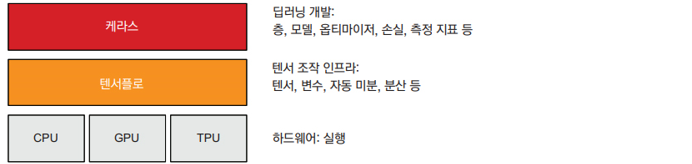

## 1. 텐서플로 시작하기

### 상수 텐서와 변수

In [3]:
x = tf.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [4]:
x = tf.zeros(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [5]:
x = tf.random.normal(shape=(3,1), mean=0, stddev=1)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.09375484],
       [ 0.23172966],
       [ 0.11792348]], dtype=float32)>

In [6]:
x = tf.random.uniform(shape=(3,1), minval=0, maxval=1)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.52261806],
       [0.7043363 ],
       [0.5597317 ]], dtype=float32)>

- 넘파이 배열에 값 할당하기

In [7]:
import numpy as np

x = np.ones(shape=(2,2))
print(x)
x[0,0] = 0 #0행 0열을 0으로 바꿈
x

[[1. 1.]
 [1. 1.]]


array([[0., 1.],
       [1., 1.]])

In [9]:
x = tf.ones(shape=(2,2))
print(x)
# x[0,0] = 100
# 에러 나옴 - tensorflow는 바꿀수 없음

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


#### tf.Variable

- 텐서플로에서 수정 가능한 상태를 관리하기 위한 클래스
- 텐서에 값을 할당하기 위한 방법 -> 변수 사용

텐서 변수 생성

In [10]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.69934684],
       [-0.81048214],
       [-0.36835045]], dtype=float32)>

#### assign 메서드

변수에 값 할당(변수 상태 변경)

In [13]:
v[0,0].assign(100)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[100.        ],
       [ -0.81048214],
       [ -0.36835045]], dtype=float32)>

In [14]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

#### assign_add(), assign_sub() 메서드

In [17]:
v.assign_add(tf.ones((3,1))) #1에다 더하기(add) 연산 - 1이 더해짐

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

In [16]:
v.assign_sub(tf.ones((3,1))) #1에다 빼기(sub) 연산 - 1이 빼짐

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

### 텐서 연산
- 수학 공식을 표현하기 위한 많은 텐서 연산 제공
- 연산이 바로 실행 됨 : **즉시 실행(eager execution)** 모드

In [22]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
print(a)
print(b)
print(c)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [23]:
d = b + c
d

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [24]:
e = tf.matmul(a,b)
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [25]:
e = e * d
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

### GradientTape API

- 미분 가능한 표현이라면 어떤 입력에 대해서도 그래디언트 계산 가능
- GradientTape 블록을 시작하고 하나 또는 여러 입력 텐서에 대해 계산을 수행한 후 입력에 대해 결과의 그래디언트를 구함

In [26]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
grad = tape.gradient(result, input_var)
print(input_var)
print(result)
print(grad)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


#### 상수 텐서 입력과 GradientTape 사용
- 상수텐서의 경우 tape.watch() 호출하여 추적한다는 것을 수동으로 알려주어야 함

In [28]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
grad = tape.gradient(result, input_const)
print(input_const)
print(result)
print(grad)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [31]:
time = tf.Variable(0.0)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acc = outer_tape.gradient(speed, time)
acc

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

- GradientTape는 모든 텐서에 대한 그레디언트를 계산하기 위해 필요한 정보를 미리 앞서 저장하는 것은 비용낭비이므로, 감시한 대상을 알아야 함
- 훈련 가능한 변수는 기본적으로 감시 대상
- 훈련가능한 변수에 대한 손실의 그래디언트를 계산하는 것이 GradientTape의 주 사용 용도

----

## 2. 신경망의 구조: 핵심 Keras API 이해하기

### 층(layer)

- 딥러닝의 구성 요소
- 신경망의 기본 데이터 구조는 층
- 충은 하나 이상의 텐서를 입력으로 받고, 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 어떤 종류의 층은 상태가 없지만 대부분의 경우 가중치(weight)라는 층의 상태를 가짐
- 가중치는 확률적 경사 하강법으로 학습되는 하나 이상의 텐서이며 여기에 신경망이 학습한 지식이 담김

#### 층마다 적절한 텐서 포맷과 데이터 처리 방식이 다름

- Dense
    - 완전 연결 층(fully connected layer) 또는 밀집 층(dense layer)
    - (samples, features)크기의 랭크-2인 텐서에 저장된 간단한 벡터 데이터를 처리
- Conv1D 또는 LSTM
    - (samples, timesteps, features)크기의 랭크-3인 텐서에 저장된 시퀀스 데이터 처리
- Conv2D
    - 랭크-4 텐서에 저장된 이미지 데이터 처리

케라스에서 딥러닝 모델을 만드는 것은 호환되는 층을 서로 연결하여 유용한 데이터 변환 파이프라인을 구성하는 것

### Keras의 Layer 클래스
- 상태(가중치)와 연산(정방향 패스)을 캡슐화한 객체
- 가중치는 일반적으로 build() 메서드에서 정의하고 연산은 call() 메서드에서 정의

In [37]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
        
    #가중치 생성
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units), initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,), initializer='zeros')
    
    #정방향 패스 계산
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [38]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu) #neural network의 relu 함수
inputs = tf.ones(shape=(2, 784))
outputs = my_dense(inputs)
print(outputs)

tf.Tensor(
[[0.         0.60998976 0.22183454 0.         0.         0.
  0.229083   0.         0.         1.6712066  1.9056178  0.84364736
  0.         0.33795077 0.         0.         0.         0.
  0.4963935  0.64060664 0.         1.1086568  0.         0.24836046
  0.         0.50789493 1.7496057  0.         0.         0.
  1.4024346  0.        ]
 [0.         0.60998976 0.22183454 0.         0.         0.
  0.229083   0.         0.         1.6712066  1.9056178  0.84364736
  0.         0.33795077 0.         0.         0.         0.
  0.4963935  0.64060664 0.         1.1086568  0.         0.24836046
  0.         0.50789493 1.7496057  0.         0.         0.
  1.4024346  0.        ]], shape=(2, 32), dtype=float32)


### 층에서 모델로 : 모델 구조 정의

- 케라스에서 모델 만드는 방법 2가지
    - 직접 Model 클래스의 서브클래스 생성
    - 함수형 API 사용
- 모델의 구조는 가설 공간을 정의
    -  네트워크 구조를 선택하면 가능성 있는 공간(가설공간)이 입력 데이터를 출력데이터로 매칭하는 일련의 특정한 텐서 연산으로 제한
-  텐서 연산에 관련된 가중치 텐서의 좋은 값을 찾아야 함

### 컴파일 단계
- 모델 구조 정의 후 학습과정 설정을 위해 다음의 세 가지를 선택함
    - 손실함수(loss function, 목적함수:object function) : 훈련 과정에서 최소화할 값, 성공의 척도
    - 옵티마이저(optimizer) : 손실함수 기반으로 네트워크가 어떻게 업데이트될지 결정, 특정 종류의 확률적 경사하강법으로 구현
    - 측정지표(metric) : 훈련과 검증 과정에서 모니터링할 성공의 척도
- compile()과 fit() 메서드를 사용하여 모델 훈련
    - compile() : 훈련과정 설정
        - 매개변수 : optimizer, loss, metrics

In [39]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

- 옵티마이저
    - SGD, RMSprop, Adam, Adagrad
- 손실
    - CategoricalCrossentropy
    - SparseCategoricalCrossentropy
    - BinaryCrossentropy
    - MeanSquaredError
    - KLDivergence
    - CosineSimilarity
- 측정지표:
    - CategoricalAccuracy
    - SparseCategoricalAccuracy
    - BinaryAccuracy
    - AUC
    - Precision
    - Recall

### fit() 메서드

- fit()호출하면 History 객체 반환
    - 딕셔너리인 history 속성
    - loss 또는 특정 측정 지표 이름의 키와 각 에포크 값의 리스트 매핑

In [ ]:
# model.fit(inputs, targets, epochs=5, batch_size=128)
#epochs: 전체 데이터에 대해 학습을 몇번 반복할지 

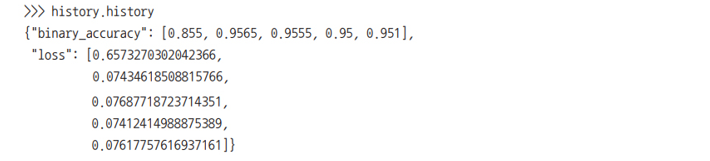

### 검증 데이터에서 손실과 측정 지표 모니터링
- fit() 메서드의 validation_data 매개변수 이용하여 검증데이터 지정
- 검증데이터는 훈련데이터 처럼 넘파이 배열이나 텐서플로 데이터셋 객체로 전달
- 검증데이터의 손실 값을 훈련 손실(traing loss)와 구분하기 위해 검증 손실(validation loss)이라고 부름
- 검증데이터는 학습한 모델이 새로운 데이터에 실제로 유용한지 모니터링하기 위한 것이므로 훈련 도중 모델에 노출되면 검증 손실과 측정 지표가 오렴됨
- 훈련이 끝난 후 검증 손실과 측정 지표를 계산하기 위해 evaluate() 메서드 사용

In [ ]:
# loss_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

### 추론(inference)

- 모델 훈련 후 이 모델에 새로운 데이터로 예측
- 예측 방법 2가지
    - `__call__()` 메서드 사용 : 학습한 모델에 새로운 데이터를 input으로 주입
    - predict() 메서드 사용

In [ ]:
# pred = model(new_inputs) #new_inputs : 새로운 데이터 넣어주기

In [ ]:
# pred = model.predict(new_inputs, batch_size=128)

-----